# This notebook will be used to create all the graphs for the report

In [1]:
# imports
import pandas as pd
from river_class import river_obj
from undershot_calcs import underTurbine
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')
data_df


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9


In [3]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity, head=2)

# create a breastshot turbine object - with values from data sheet
breast_turbine = breastTurbine(river)




Systematic error:  0.2854295943166135


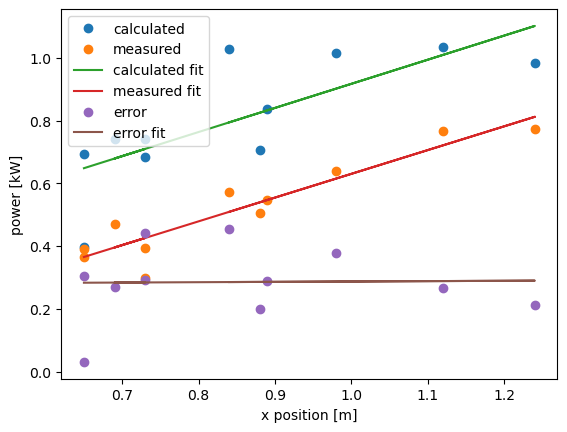

In [4]:


# loop through df and create a turbine object for each row
power_list = []
for index, row in data_df.iterrows():
    breast_turbine.__init__(river,x_centre=row['x centre [m]'], y_centre=row['y centre [m]'], RPM=row['Turbine rotational speed [RPM]'])
    power_list.append(breast_turbine.analysis()/1000)


# add power list to df
data_df['power [W]'] = power_list 

# plot power vs x position
plt.figure()
plt.plot(data_df['x centre [m]'], data_df['power [W]'], 'o', label='calculated')
plt.plot(data_df['x centre [m]'], data_df['Output power [kW]'], 'o', label='measured')
# plot 3rd order line of best fit for both sets of data
plt.plot(data_df['x centre [m]'], np.poly1d(np.polyfit(data_df['x centre [m]'], data_df['power [W]'], 1))(data_df['x centre [m]']), label='calculated fit')
plt.plot(data_df['x centre [m]'], np.poly1d(np.polyfit(data_df['x centre [m]'], data_df['Output power [kW]'], 1))(data_df['x centre [m]']), label='measured fit')

# calculate the error and plot
error = data_df['power [W]'] - data_df['Output power [kW]']
plt.plot(data_df['x centre [m]'], error, 'o', label='error')
plt.plot(data_df['x centre [m]'], np.poly1d(np.polyfit(data_df['x centre [m]'], error, 1))(data_df['x centre [m]']), label='error fit')

# store the systematic error as a variable
sys_error = np.mean(np.poly1d(np.polyfit(data_df['x centre [m]'], error, 1))(data_df['x centre [m]']))
print('Systematic error: ', sys_error)


plt.xlabel('x position [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


Systematic error =  0.2854295943166134


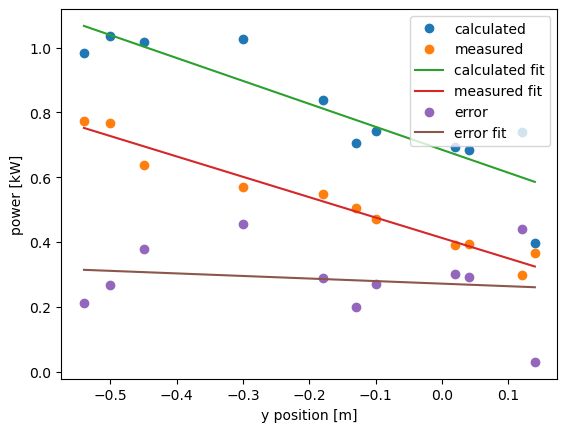

In [5]:
# plot power vs y position
plt.figure()
plt.plot(data_df['y centre [m]'], data_df['power [W]'] , 'o', label='calculated')
plt.plot(data_df['y centre [m]'], data_df['Output power [kW]'], 'o' , label='measured')

# plot line of best fit for both sets of data
plt.plot(np.unique(data_df['y centre [m]']), np.poly1d(np.polyfit(data_df['y centre [m]'], data_df['power [W]'], 1))(np.unique(data_df['y centre [m]'])), label='calculated fit')
plt.plot(np.unique(data_df['y centre [m]']), np.poly1d(np.polyfit(data_df['y centre [m]'], data_df['Output power [kW]'], 1))(np.unique(data_df['y centre [m]'])), label='measured fit')

# calculate the error and plot
error = data_df['power [W]'] - data_df['Output power [kW]']
plt.plot(data_df['y centre [m]'], error, 'o', label='error')
plt.plot(np.unique(data_df['y centre [m]']), np.poly1d(np.polyfit(data_df['y centre [m]'], error, 1))(np.unique(data_df['y centre [m]'])), label='error fit')

# store the systemtatic error value as a variable
sys_error = np.mean(np.poly1d(np.polyfit(data_df['y centre [m]'], error, 1))(np.unique(data_df['y centre [m]'])))
print('Systematic error = ', sys_error)

plt.xlabel('y position [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


Systematic error =  0.28544408861957216


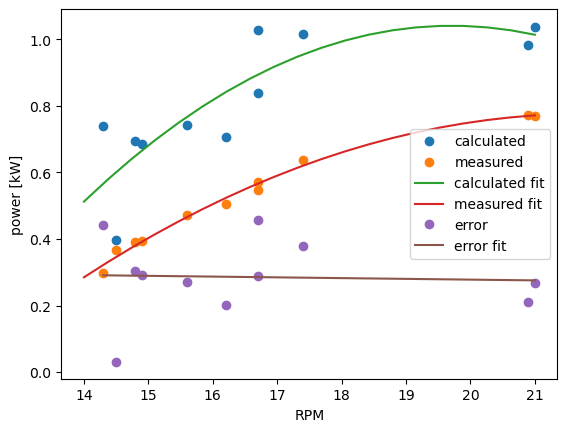

In [6]:
# plot power vs RPM

plt.figure()
plt.plot(data_df['Turbine rotational speed [RPM]'], data_df['power [W]'] , 'o', label='calculated')
plt.plot(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 'o', label='measured')

# plot line of best fit for both sets of data
# plt.plot(np.unique(data_df['Turbine rotational speed [RPM]']), np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['power [W]'], 1))(np.unique(data_df['Turbine rotational speed [RPM]'])), label='calculated fit')
# plt.plot(np.unique(data_df['Turbine rotational speed [RPM]']), np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 1))(np.unique(data_df['Turbine rotational speed [RPM]'])), label='measured fit')

# plot smooth second order line of best fit for both sets of data using 20 points on x axis
x = np.linspace(14, 21, 20)
plt.plot(x, np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['power [W]'], 2))(x), label='calculated fit')
plt.plot(x, np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 2))(x), label='measured fit')

# calculate the error and plot
error = data_df['power [W]'] - data_df['Output power [kW]']
plt.plot(data_df['Turbine rotational speed [RPM]'], error, 'o', label='error')
plt.plot(np.unique(data_df['Turbine rotational speed [RPM]']), np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], error, 1))(np.unique(data_df['Turbine rotational speed [RPM]'])), label='error fit')

# store the systemtatic error value as a variable
sys_error = np.mean(np.poly1d(np.polyfit(data_df['Turbine rotational speed [RPM]'], error, 1))(np.unique(data_df['Turbine rotational speed [RPM]'])))
print('Systematic error = ', sys_error)


plt.xlabel('RPM')
plt.ylabel('power [kW]')
plt.legend()

plt.show()


this shows that the model accurately can reflect the trends seen in the test data for installation locations and RPM pairings.

Now sensitivity analysis can be conducted with the trends represented fairly.

# Sensitivity Analysis

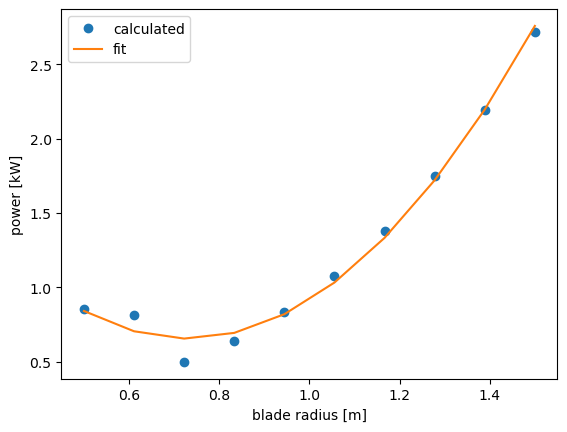

In [12]:
# blade radius vs power

# create a list of blade radii
radii = np.linspace(0.5, 1.5, 10)

# create a list of power values
power = []

# loop through the radii and calculate the power for each
for radius in radii:
    breast_turbine.__init__(river, radius=radius)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs blade radius
plt.figure()
plt.plot(radii, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(radii), np.poly1d(np.polyfit(radii, power, 2))(np.unique(radii)), label='fit')

plt.xlabel('blade radius [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


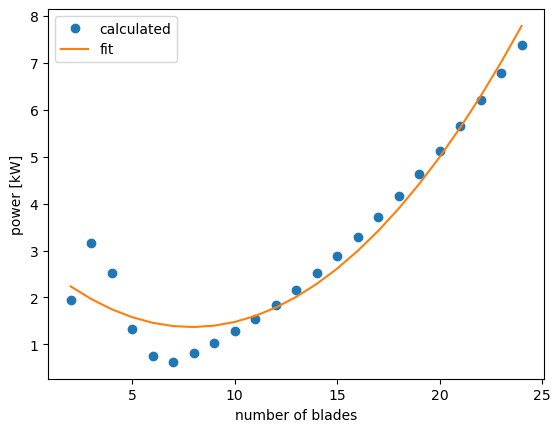

In [19]:
# number of blades sensitivity analysis

# create a list of number of blades
blades = range(2, 25)

# create a list of power values
power = []

# loop through the number of blades and calculate the power for each
for blade in blades:
    breast_turbine.__init__(river, num_blades=blade)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs number of blades
plt.figure()
plt.plot(blades, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(blades), np.poly1d(np.polyfit(blades, power, 2))(np.unique(blades)), label='fit')

plt.xlabel('number of blades')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

This trend is not entirely accurate as the effect of blade blocking is not accounted for by the mathematical model. For greater accuracy a blade blocking component will need to be introduced to the model.

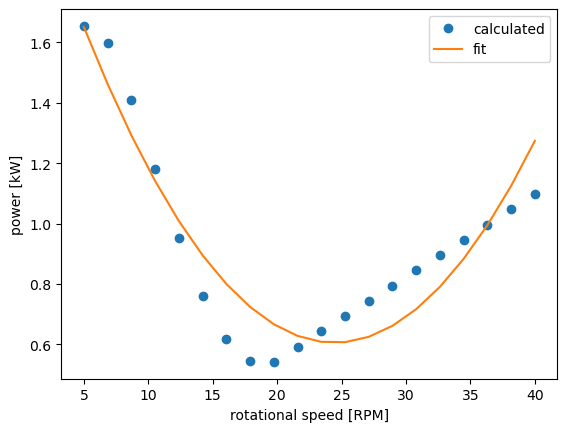

In [22]:
# rotational speed sensitivity analysis

# create a list of rotational speeds
speeds = np.linspace(5, 40, 20)

# create a list of power values
power = []

# loop through the rotational speeds and calculate the power for each
for speed in speeds:
    breast_turbine.__init__(river, RPM=speed, num_blades=6, x_centre=1, y_centre=-0.1)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs rotational speed
plt.figure()
plt.plot(speeds, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(speeds), np.poly1d(np.polyfit(speeds, power, 2))(np.unique(speeds)), label='fit')

plt.xlabel('rotational speed [RPM]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()





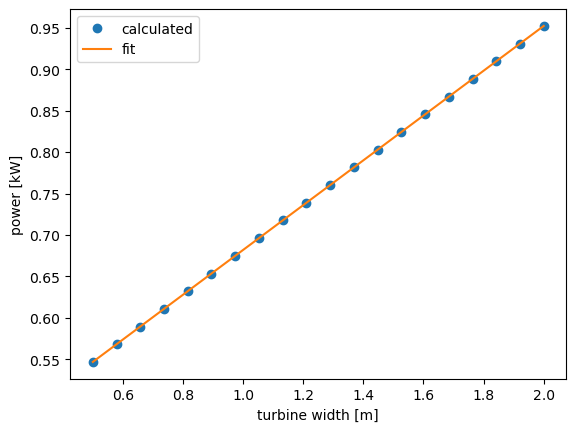

In [23]:
# turbine width sensitivity analysis

# create a list of turbine widths
widths = np.linspace(0.5, 2, 20)

# create a list of power values
power = []

# loop through the turbine widths and calculate the power for each
for width in widths:
    breast_turbine.__init__(river, width=width, num_blades=6, x_centre=1, y_centre=-0.1)
    power.append(breast_turbine.analysis()/1000)

# plot the power vs turbine width
plt.figure()
plt.plot(widths, power, 'o', label='calculated')

# plot the line of best fit
plt.plot(np.unique(widths), np.poly1d(np.polyfit(widths, power, 2))(np.unique(widths)), label='fit')

plt.xlabel('turbine width [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

